In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
url_gca = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'
url_possession = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,1043,1387,...,207,44.4,2,1.4,+0.6,19,48,36,8,92
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,1239,1506,...,293,61.1,0,0.3,-0.3,7,77,6,0,87
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1532,1671,...,214,86.0,0,1.1,-1.1,15,77,13,1,81
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,1282,1571,...,290,66.6,2,2.8,-0.8,28,121,17,6,126
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,1174,1378,...,209,69.9,1,1.0,0.0,15,113,10,1,97
3001,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,704,878,...,88,61.4,2,1.5,+0.5,19,51,19,3,65
3002,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,1253,1481,...,213,68.1,4,6.3,-2.3,68,91,61,3,140
3003,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,408,655,...,14,64.3,4,2.8,+1.2,29,18,4,0,30


In [5]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,0,12,...,0.00,20.7,0,0,0,0.7,0.7,0.06,-0.7,-0.7
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,2,18,...,0.33,18.7,0,0,0,1.2,1.2,0.07,+0.8,+0.8
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1,18,...,0.20,20.3,0,0,0,0.8,0.8,0.04,+0.2,+0.2
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,0,29,...,0.00,22.4,0,0,0,2.0,2.0,0.07,-2.0,-2.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,2,21,...,0.20,13.7,0,0,0,2.0,2.0,0.09,0.0,0.0
3001,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,6,46,...,0.35,18.9,0,0,0,3.9,3.9,0.09,+2.1,+2.1
3002,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,6,49,...,0.30,20.6,12,0,0,4.6,4.6,0.09,+1.4,+1.4
3003,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,5,46,...,0.22,9.8,0,1,1,5.4,4.6,0.10,-0.4,-0.6


In [6]:
data_gca = pd.read_html(url_gca, header=1)[0]
data_gca = data_gca[data_gca['Player'] != 'Player']
data_gca = data_gca.drop(columns=['Rk', 'Matches'])
data_gca

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,37,1.19,...,2,0,5,0.16,5,0,0,0,0,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,20,0.62,...,0,3,1,0.03,0,0,1,0,0,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,40,1.46,...,4,2,1,0.04,1,0,0,0,0,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,63,1.98,...,7,6,5,0.16,4,0,0,0,1,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,0,0.00,...,0,0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,34,1.22,...,4,3,1,0.04,1,0,0,0,0,0
3001,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,59,2.39,...,6,0,4,0.16,3,0,0,1,0,0
3002,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,123,4.25,...,2,1,12,0.41,12,0,0,0,0,0
3003,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,50,2.17,...,5,0,8,0.35,5,0,0,2,1,0


In [7]:
data_poss = pd.read_html(url_possession, header=1)[0]
data_poss = data_poss[data_poss['Player'] != 'Player']
data_poss = data_poss.drop(columns=['Rk', 'Matches'])
data_poss

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,Def Pen,...,PrgDist,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,1793,159,...,3722,161,50,12,26,31,1107,992,89.6,40
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,1843,266,...,3681,90,23,0,14,13,1194,1160,97.2,12
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1930,55,...,2912,78,20,4,23,40,1605,1484,92.5,47
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,1948,22,...,2745,92,37,3,28,46,1452,1350,93.0,56
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,12,0,...,9,0,1,0,4,0,12,8,66.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,1643,105,...,2871,99,29,0,17,9,1143,1106,96.8,22
3001,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,1275,58,...,3644,159,56,6,52,58,965,834,86.4,84
3002,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,1737,18,...,3230,179,56,10,41,47,1481,1295,87.4,109
3003,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,871,37,...,261,13,4,4,46,27,1097,711,64.8,115


In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
data_gca.iloc[:, 7:] = data_gca.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)
data_poss.iloc[:, 7:] = data_poss.iloc[:, 7:].astype(float)

In [10]:
data_gca = data_gca.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_poss = data_poss.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [33]:
player_data = pd.merge(data_shooting, data_gca, on="Player")
player_data = player_data.drop_duplicates(subset='Player')
player_data = pd.merge(player_data, data_passing, on='Player')
player_data = player_data.drop_duplicates(subset='Player')
player_data = pd.merge(player_data, data_poss, on='Player')
player_data = player_data.drop_duplicates(subset='Player')
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh_x,...,PrgDist_y,Prog_y,1/3_y,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-132,2000,31.0,0.0,12.0,...,3722.0,161.0,50.0,12.0,26.0,31.0,1107.0,992.0,89.6,40.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-230,1987,32.1,2.0,18.0,...,3681.0,90.0,23.0,0.0,14.0,13.0,1194.0,1160.0,97.2,12.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,22-051,2000,27.4,1.0,18.0,...,2912.0,78.0,20.0,4.0,23.0,40.0,1605.0,1484.0,92.5,47.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-104,1993,31.9,0.0,29.0,...,2745.0,92.0,37.0,3.0,28.0,46.0,1452.0,1350.0,93.0,56.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,0.0,0.0,...,9.0,0.0,1.0,0.0,4.0,0.0,12.0,8.0,66.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-103,1999,27.8,2.0,21.0,...,2871.0,99.0,29.0,0.0,17.0,9.0,1143.0,1106.0,96.8,22.0
2886,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-233,1997,24.6,6.0,46.0,...,3644.0,159.0,56.0,6.0,52.0,58.0,965.0,834.0,86.4,84.0
2887,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-150,1998,28.9,6.0,49.0,...,3230.0,179.0,56.0,10.0,41.0,47.0,1481.0,1295.0,87.4,109.0
2888,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,5.0,46.0,...,261.0,13.0,4.0,4.0,46.0,27.0,1097.0,711.0,64.8,115.0


In [34]:
# player_data.info()

In [13]:
data = player_data[player_data['90s'].astype(float) >= 10.0]
data = data[['Player', '90s', 'Gls', 'Sh_x', 'SoT', 'xG', 'npxG', 'SCA', 'Drib', 'GCA', 'PrgDist_x', 'Ast', 'xA', 'KP', '1/3_x', 'PPA', 'CrsPA', '1/3_y', 'CPA']]
data.iloc[:, 2:] = data.iloc[:, 2:].div(data['90s'], axis=0)
data

,Player,90s,Gls,Sh_x,SoT,xG,npxG,SCA,Drib,GCA,PrgDist_x,Ast,xA,KP,1/3_x,PPA,CrsPA,1/3_y,CPA
0,Max Aarons,31.0,0.0,0.387097,0.064516,0.022581,0.022581,1.193548,0.096774,0.16129,217.258065,0.064516,0.045161,0.612903,1.548387,1.16129,0.258065,1.612903,0.387097
1,Yunis Abdelhamid,32.1,0.062305,0.560748,0.186916,0.037383,0.037383,0.623053,0.093458,0.031153,282.398754,0.0,0.009346,0.218069,2.398754,0.186916,0.0,0.716511,0.0
2,Salis Abdul Samed,27.4,0.036496,0.656934,0.182482,0.029197,0.029197,1.459854,0.0,0.036496,184.379562,0.0,0.040146,0.547445,2.810219,0.474453,0.036496,0.729927,0.145985
3,Laurent Abergel,31.9,0.0,0.909091,0.219436,0.062696,0.062696,1.974922,0.031348,0.15674,202.476489,0.062696,0.087774,0.877743,3.793103,0.532915,0.188088,1.159875,0.094044
7,Tammy Abraham,33.3,0.45045,2.732733,0.930931,0.582583,0.537538,2.342342,0.03003,0.33033,51.831832,0.12012,0.105105,1.021021,1.111111,0.840841,0.12012,0.810811,0.690691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Igor Zubeldia,18.3,0.0,0.491803,0.10929,0.043716,0.043716,0.437158,0.0,0.0,311.748634,0.054645,0.010929,0.054645,2.677596,0.218579,0.10929,0.054645,0.0
2885,Martín Zubimendi,27.8,0.071942,0.755396,0.359712,0.071942,0.071942,1.223022,0.0,0.035971,205.899281,0.035971,0.035971,0.539568,4.064748,0.359712,0.035971,1.043165,0.0
2886,Szymon Żurkowski,24.6,0.243902,1.869919,0.691057,0.158537,0.158537,2.398374,0.04065,0.162602,113.170732,0.081301,0.060976,0.772358,2.073171,0.772358,0.121951,2.276423,0.243902
2887,Martin Ødegaard,28.9,0.207612,1.695502,0.692042,0.15917,0.15917,4.256055,0.17301,0.415225,172.00692,0.138408,0.217993,2.352941,3.148789,2.110727,0.103806,1.937716,0.346021


In [14]:
data.sort_values(by='Gls')

,Player,90s,Gls,Sh_x,SoT,xG,npxG,SCA,Drib,GCA,PrgDist_x,Ast,xA,KP,1/3_x,PPA,CrsPA,1/3_y,CPA
0,Max Aarons,31.0,0.0,0.387097,0.064516,0.022581,0.022581,1.193548,0.096774,0.16129,217.258065,0.064516,0.045161,0.612903,1.548387,1.16129,0.258065,1.612903,0.387097
1882,Paul Nardi,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.5,0.0,0.0,0.0,0.5,0.045455,0.0,0.0,0.0
1880,Nahitan Nández,15.9,0.0,1.006289,0.125786,0.050314,0.050314,2.264151,0.062893,0.314465,138.993711,0.125786,0.081761,1.006289,2.138365,1.320755,0.503145,2.45283,1.194969
1874,Kévin N'Doram,13.7,0.0,0.510949,0.072993,0.080292,0.080292,1.459854,0.072993,0.072993,163.357664,0.0,0.029197,0.80292,3.430657,0.072993,0.0,0.291971,0.072993
1868,Juan Musso,31.6,0.0,0.0,0.0,0.0,0.0,0.063291,0.0,0.0,395.443038,0.0,0.0,0.0,0.253165,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Pierre-Emerick Aubameyang,11.4,0.964912,3.070175,1.754386,0.596491,0.596491,1.22807,0.0,0.175439,23.245614,0.087719,0.087719,0.614035,0.526316,0.701754,0.0,0.350877,0.789474
280,Karim Benzema,27.8,0.971223,3.992806,1.654676,0.830935,0.532374,4.280576,0.431655,0.755396,125.107914,0.431655,0.341727,2.158273,2.266187,3.021583,0.143885,2.122302,1.618705
1111,Erling Haaland,21.2,1.037736,3.490566,1.462264,0.830189,0.613208,2.59434,0.188679,0.660377,39.150943,0.377358,0.268868,1.132075,0.613208,0.943396,0.0,0.801887,1.367925
2399,Patrik Schick,23.1,1.038961,3.809524,1.818182,0.770563,0.705628,2.121212,0.21645,0.692641,31.861472,0.12987,0.103896,0.649351,0.519481,0.4329,0.0,0.38961,0.692641


In [15]:
d = data.rank(0, ascending=False, method='first')
d.sort_values(by='Gls')

,Player,90s,Gls,Sh_x,SoT,xG,npxG,SCA,Drib,GCA,PrgDist_x,Ast,xA,KP,1/3_x,PPA,CrsPA,1/3_y,CPA
1501,314.0,110.0,1.0,1.0,1.0,1.0,1.0,200.0,68.0,161.0,1447.0,574.0,212.0,382.0,1187.0,512.0,840.0,1025.0,255.0
2399,413.0,648.0,2.0,14.0,2.0,5.0,2.0,575.0,227.0,31.0,1524.0,404.0,532.0,873.0,1444.0,994.0,1494.0,1229.0,284.0
1111,1182.0,769.0,3.0,25.0,20.0,3.0,9.0,370.0,286.0,36.0,1500.0,25.0,45.0,440.0,1416.0,518.0,1285.0,970.0,76.0
280,811.0,366.0,4.0,10.0,10.0,2.0,20.0,43.0,50.0,21.0,1184.0,12.0,14.0,64.0,804.0,2.0,695.0,192.0,45.0
138,381.0,1457.0,5.0,56.0,4.0,24.0,10.0,993.0,908.0,733.0,1551.0,598.0,653.0,909.0,1442.0,738.0,1139.0,1262.0,247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,1533.0,18.0,1558.0,818.0,967.0,1022.0,1014.0,570.0,395.0,776.0,511.0,638.0,764.0,480.0,846.0,187.0,40.0,350.0,689.0
2869,306.0,153.0,1559.0,1562.0,1562.0,1562.0,1562.0,1495.0,1555.0,1560.0,254.0,1560.0,1561.0,1561.0,1355.0,1428.0,1559.0,1562.0,1559.0
2875,1272.0,1309.0,1560.0,1180.0,822.0,922.0,910.0,1324.0,1557.0,1101.0,1069.0,1561.0,1085.0,1145.0,1121.0,1191.0,1560.0,1024.0,1005.0
2877,448.0,1484.0,1561.0,652.0,579.0,1091.0,1084.0,166.0,1558.0,25.0,156.0,96.0,251.0,351.0,12.0,74.0,446.0,13.0,780.0


In [16]:
player_data = player_data[player_data['Age'] <= '22-000']
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh_x,...,PrgDist_y,Prog_y,1/3_y,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
6,Matthis Abline,fr FRA,FW,Rennes,fr Ligue 1,19-049,2003,1.1,0.0,2.0,...,35.0,3.0,0.0,0.0,2.0,5.0,39.0,13.0,33.3,8.0
15,Martin Adeline,fr FRA,"MF,FW",Reims,fr Ligue 1,18-165,2003,3.9,0.0,4.0,...,300.0,8.0,1.0,0.0,8.0,3.0,134.0,107.0,79.9,11.0
17,Yacine Adli,fr FRA,"MF,FW",Bordeaux,fr Ligue 1,21-291,2000,25.1,1.0,33.0,...,3113.0,154.0,48.0,15.0,46.0,65.0,1274.0,1094.0,85.9,92.0
19,Felix Afena-Gyan,gh GHA,"FW,MF",Roma,it Serie A,19-117,2003,7.4,2.0,18.0,...,769.0,29.0,16.0,7.0,33.0,32.0,372.0,220.0,59.1,66.0
21,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,21-141,2000,4.0,0.0,0.0,...,75.0,0.0,0.0,0.0,0.0,0.0,26.0,25.0,96.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,Nicola Zalewski,pl POL,DF,Roma,it Serie A,20-113,2002,8.2,0.0,9.0,...,1791.0,76.0,24.0,9.0,8.0,9.0,371.0,347.0,93.5,16.0
2858,Alessandro Zanoli,it ITA,DF,Napoli,it Serie A,21-225,2000,4.1,0.0,0.0,...,504.0,24.0,11.0,0.0,3.0,4.0,183.0,173.0,94.5,3.0
2859,Mattia Zanotti,it ITA,DF,Inter,it Serie A,19-125,2003,0.1,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,100.0,1.0
2875,David Zima,cz CZE,DF,Torino,it Serie A,21-189,2000,13.6,0.0,6.0,...,924.0,27.0,10.0,1.0,5.0,5.0,461.0,443.0,96.1,7.0


In [17]:
data = player_data[player_data['90s'].astype(float) >= 10.0]
data = data[['Player', '90s', 'Gls', 'xG', 'Ast', 'xA']]
data['Gp90'] = data['Gls']/data['90s']
data['Ap90'] = data['Ast']/data['90s']
data['xGp90'] = data['xG']/data['90s']
data['xAp90'] = data['xA']/data['90s']

data['G+Ap90'] = data['Gp90'] + data['Ap90']
data['xG+xAp90'] = data['xGp90'] + data['xAp90']

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

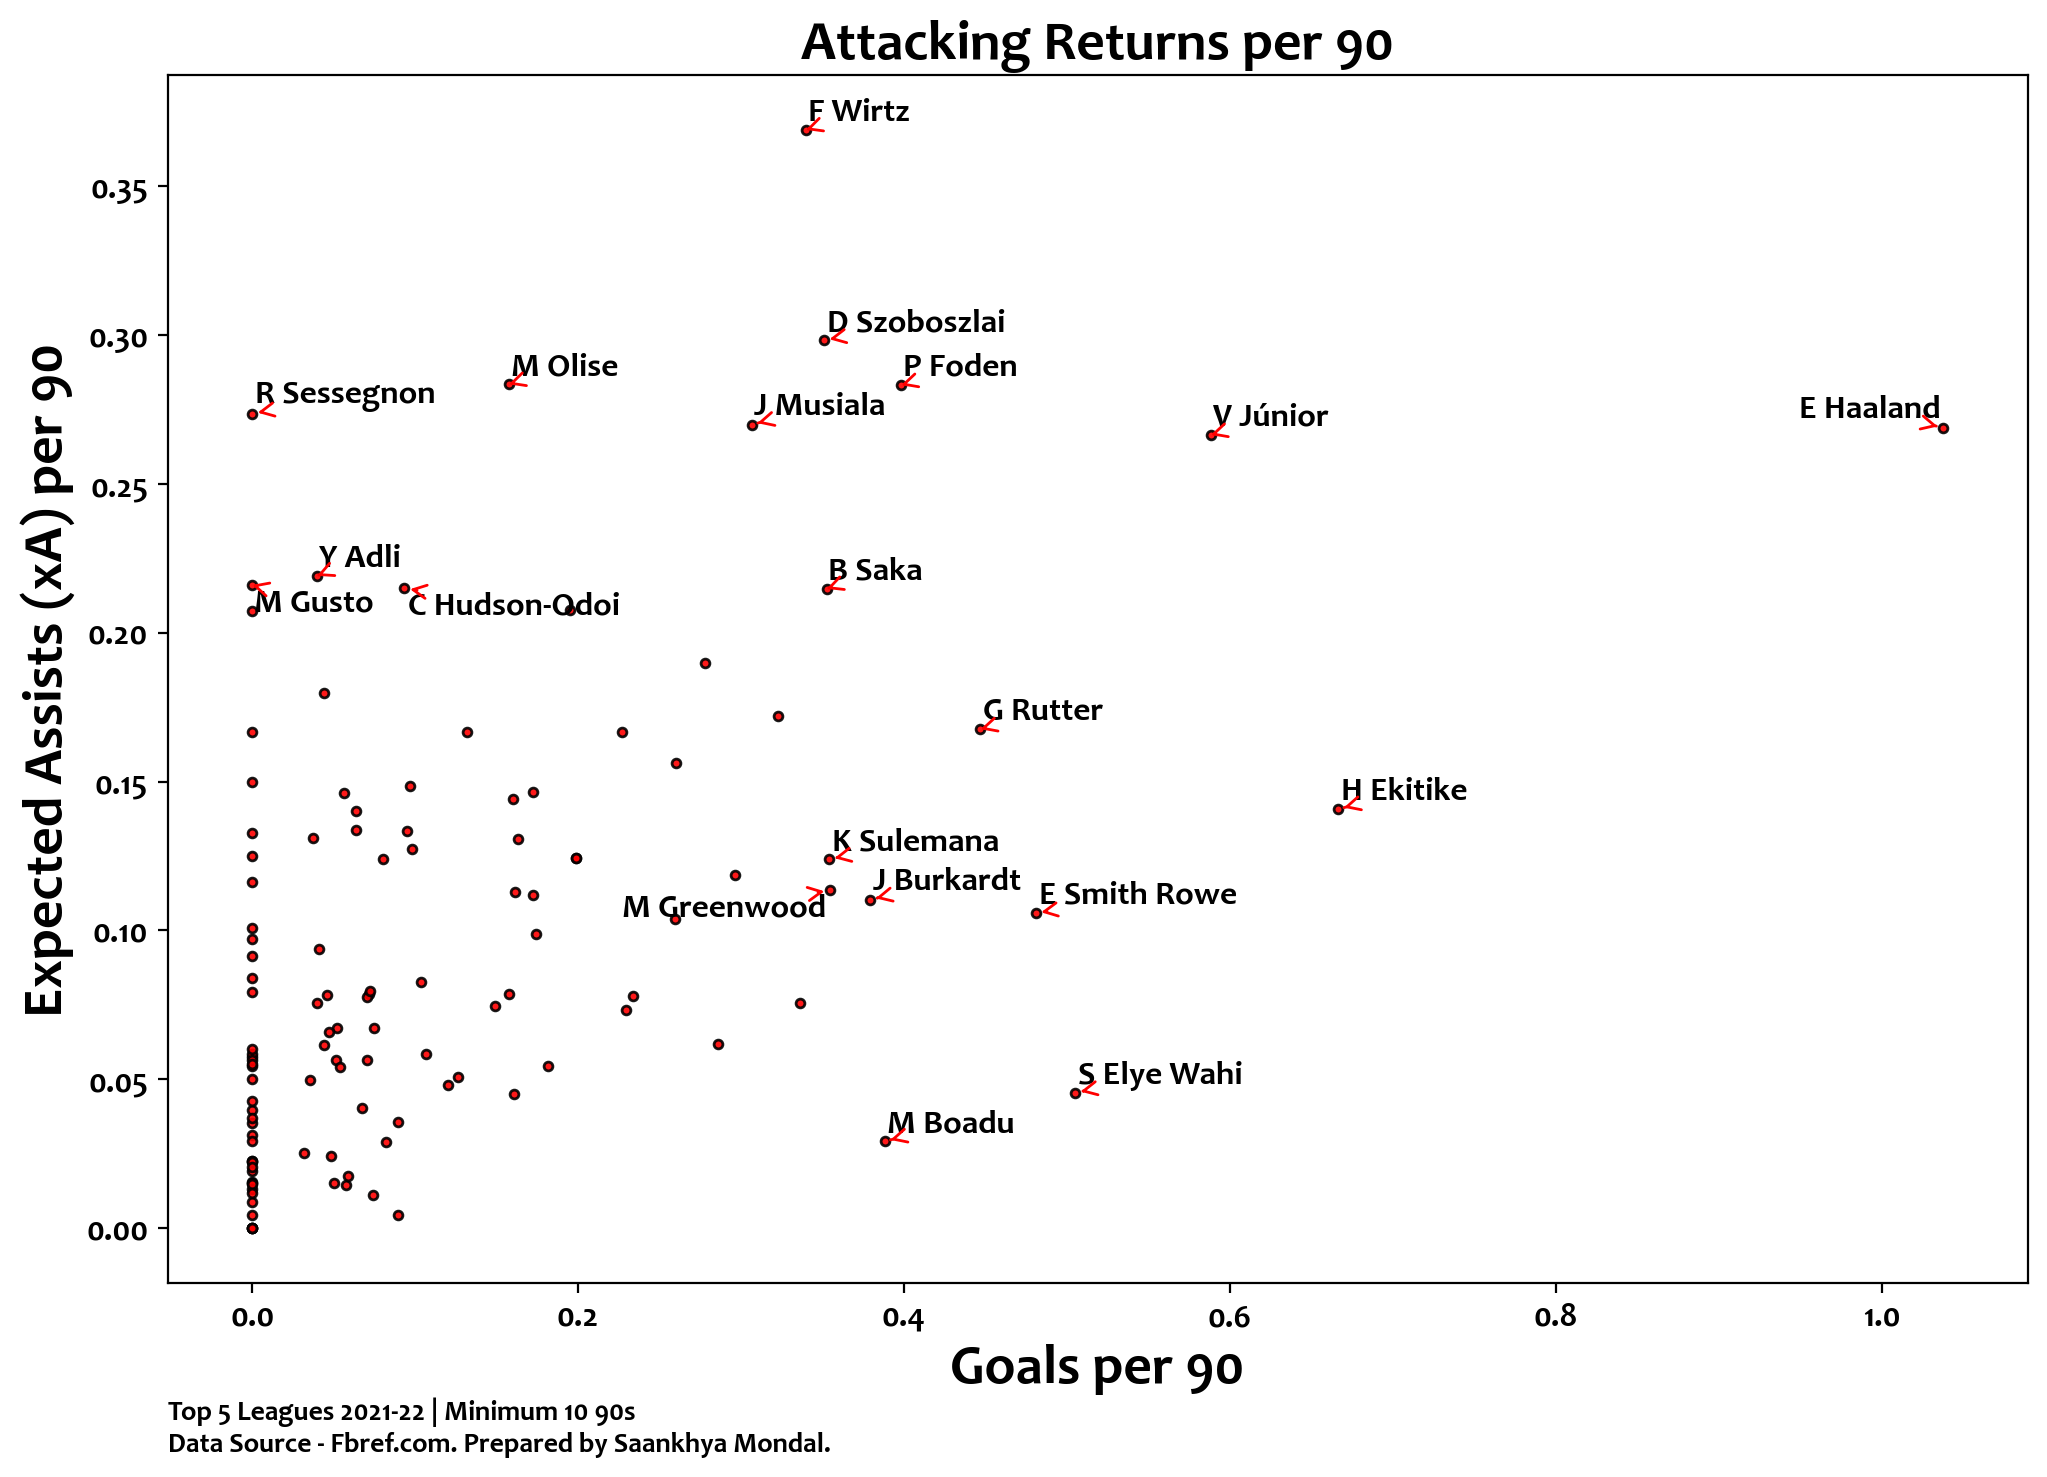

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.90)
outlier_bottom = data['xAp90'].quantile(0.1)
outlier_right = data['Gp90'].quantile(0.90)
outlier_left = data['Gp90'].quantile(0.1)

par_x = list(data['Gp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Attacking Returns per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 10 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

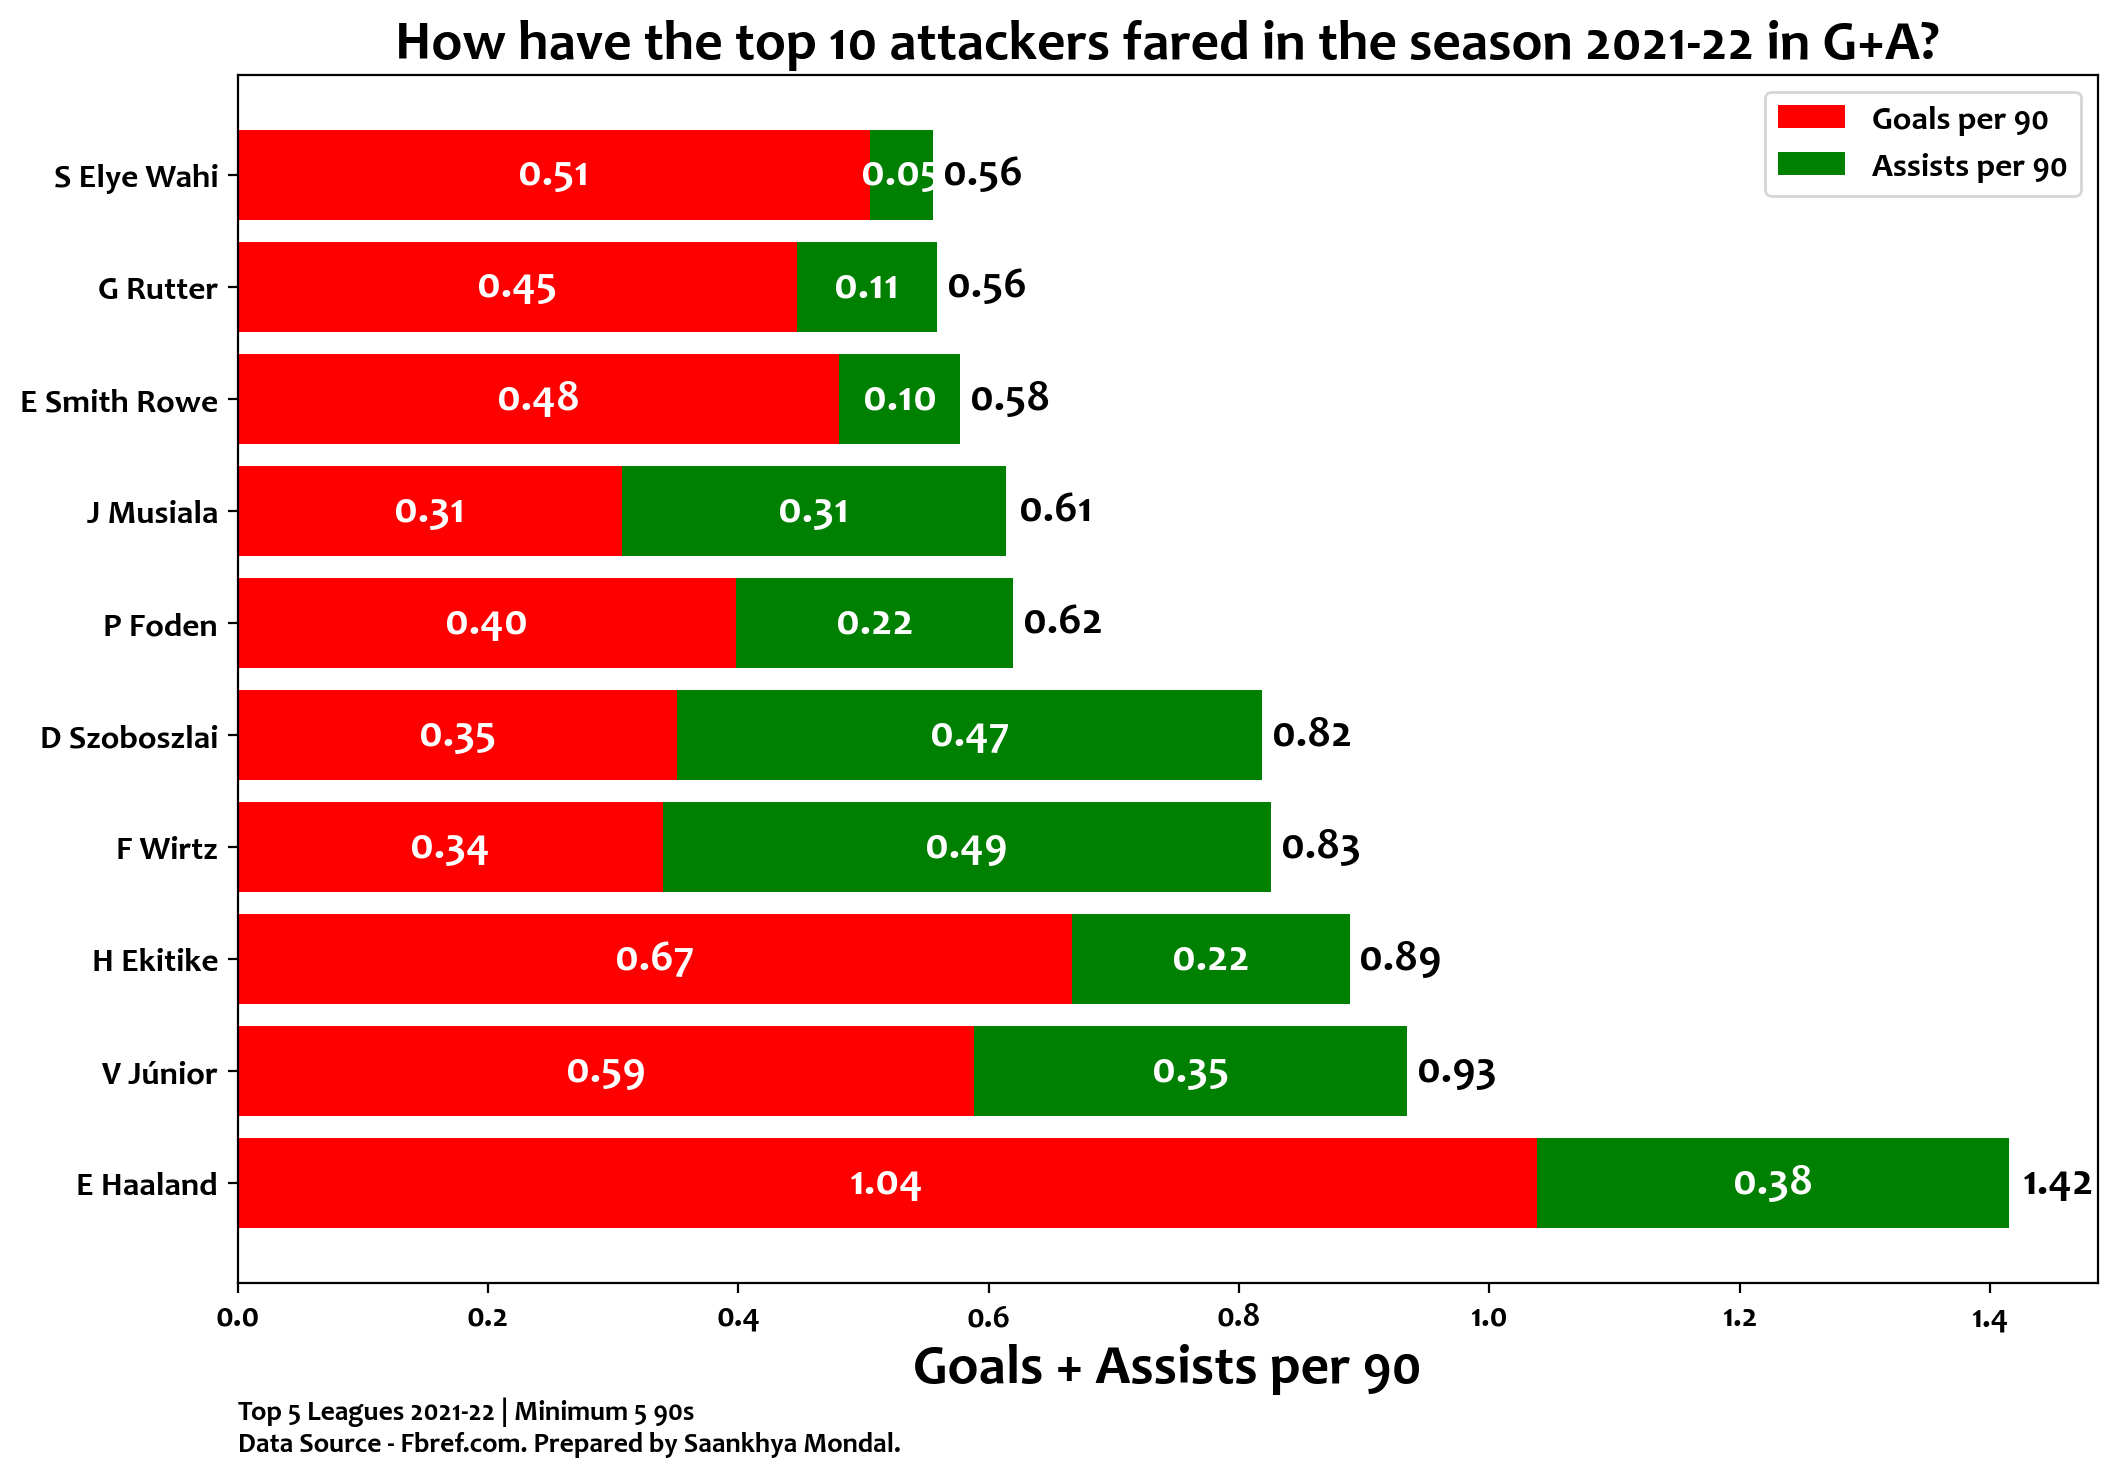

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
d = data.sort_values(by='G+Ap90', ascending=False)
d = d.iloc[:10]
fig.set_dpi(200)
p1 = list(d['Gp90'])
p2 = list(d['Ap90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Goals per 90', 'Assists per 90'])
plt.xlabel('Goals + Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

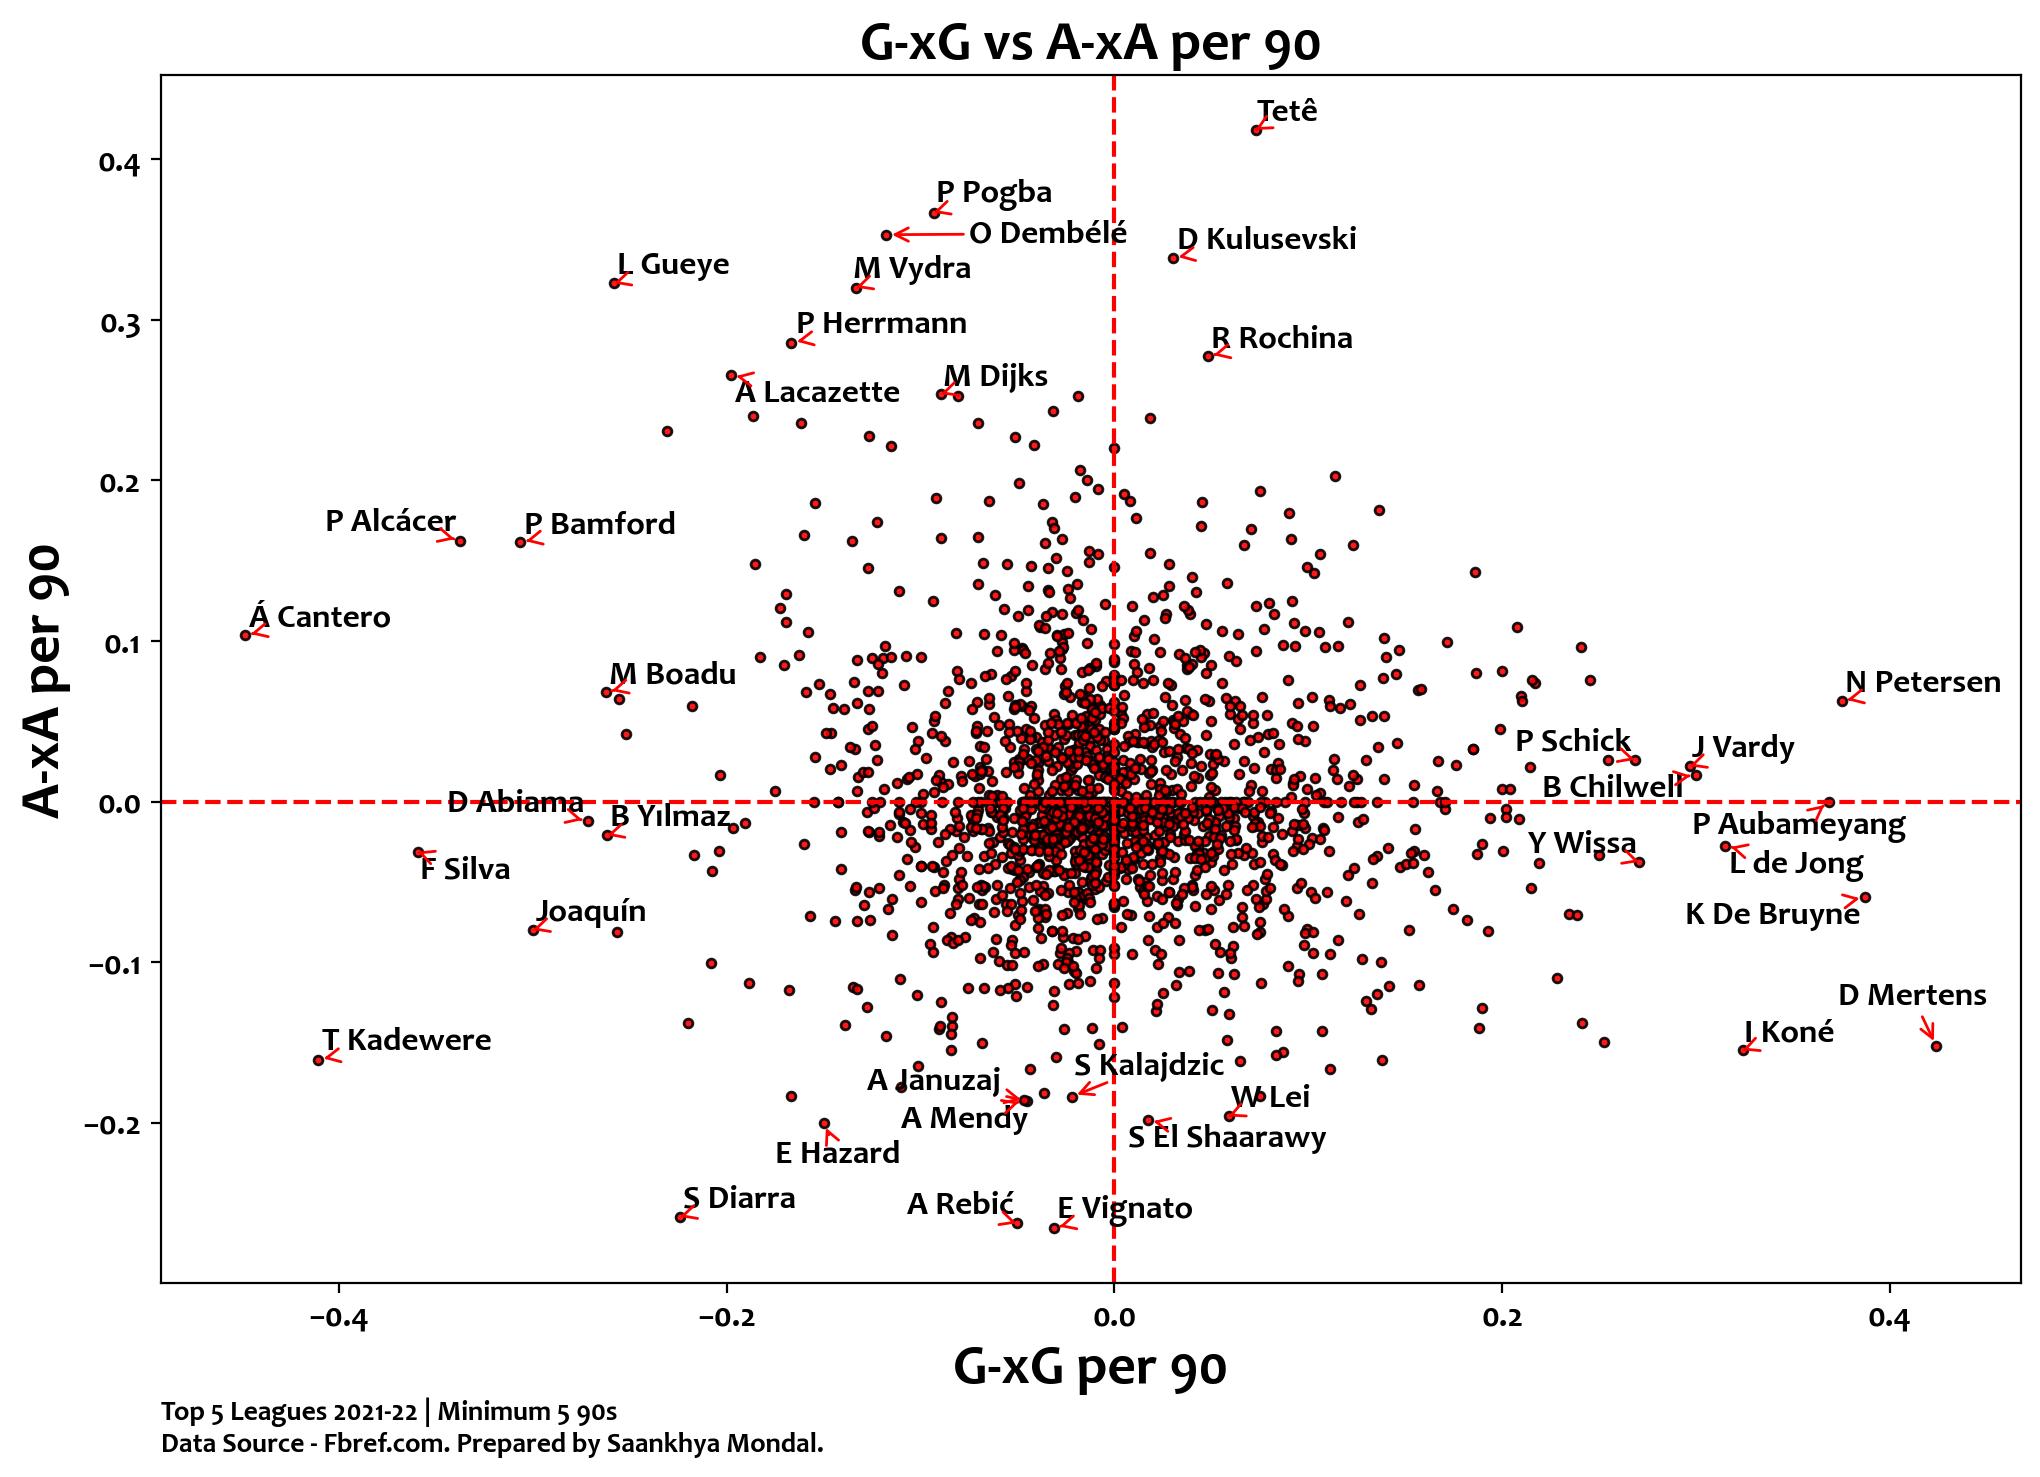

In [35]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['A-xAp90'] = data['A-xA']/data['90s']
data['G-xGp90'] = data['G-xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

ax.axhline(0, ls='--', lw=1.5, color='red')
ax.axvline(0, ls='--', lw=1.5, color='red')

outlier_top = data['A-xAp90'].quantile(0.995)
outlier_bottom = data['A-xAp90'].quantile(0.005)
outlier_right = data['G-xGp90'].quantile(0.995)
outlier_left = data['G-xGp90'].quantile(0.005)

par_x = list(data['G-xGp90'].astype(float))
par_y = list(data['A-xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))


ax.set_xlabel('G-xG per 90', fontsize=20)
ax.set_ylabel('A-xA per 90', fontsize=20)
ax.set_title('G-xG vs A-xA per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [36]:
player_data = player_data[player_data['Pos'].str.contains('FW')]
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh_x,...,PrgDist_y,Prog_y,1/3_y,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,22-034,2000,0.5,0.0,0.0,...,9.0,0.0,1.0,0.0,4.0,0.0,12.0,8.0,66.7,2.0
5,Dickson Abiama,ng NGA,FW,Greuther Fürth,de Bundesliga,23-194,1998,8.1,0.0,18.0,...,326.0,21.0,8.0,7.0,41.0,11.0,335.0,171.0,51.0,48.0
6,Matthis Abline,fr FRA,FW,Rennes,fr Ligue 1,19-049,2003,1.1,0.0,2.0,...,35.0,3.0,0.0,0.0,2.0,5.0,39.0,13.0,33.3,8.0
7,Tammy Abraham,eng ENG,FW,Roma,it Serie A,24-226,1997,33.3,15.0,91.0,...,1312.0,81.0,27.0,23.0,78.0,43.0,1373.0,746.0,54.3,223.0
10,Ragnar Ache,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,23-292,1998,2.9,0.0,11.0,...,279.0,16.0,6.0,5.0,16.0,8.0,166.0,101.0,60.8,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,Edon Zhegrova,xk KVX,"MF,FW",Lille,fr Ligue 1,23-046,1999,5.3,2.0,15.0,...,992.0,68.0,10.0,7.0,12.0,13.0,272.0,237.0,87.1,24.0
2878,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,eng Premier League,29-058,1993,12.7,4.0,44.0,...,1405.0,85.0,22.0,19.0,24.0,33.0,695.0,583.0,83.9,101.0
2880,Simon Zoller,de GER,FW,Bochum,de Bundesliga,30-324,1991,6.6,3.0,11.0,...,192.0,7.0,2.0,1.0,14.0,0.0,221.0,132.0,59.7,20.0
2888,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-359,1990,23.1,5.0,46.0,...,261.0,13.0,4.0,4.0,46.0,27.0,1097.0,711.0,64.8,115.0


c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

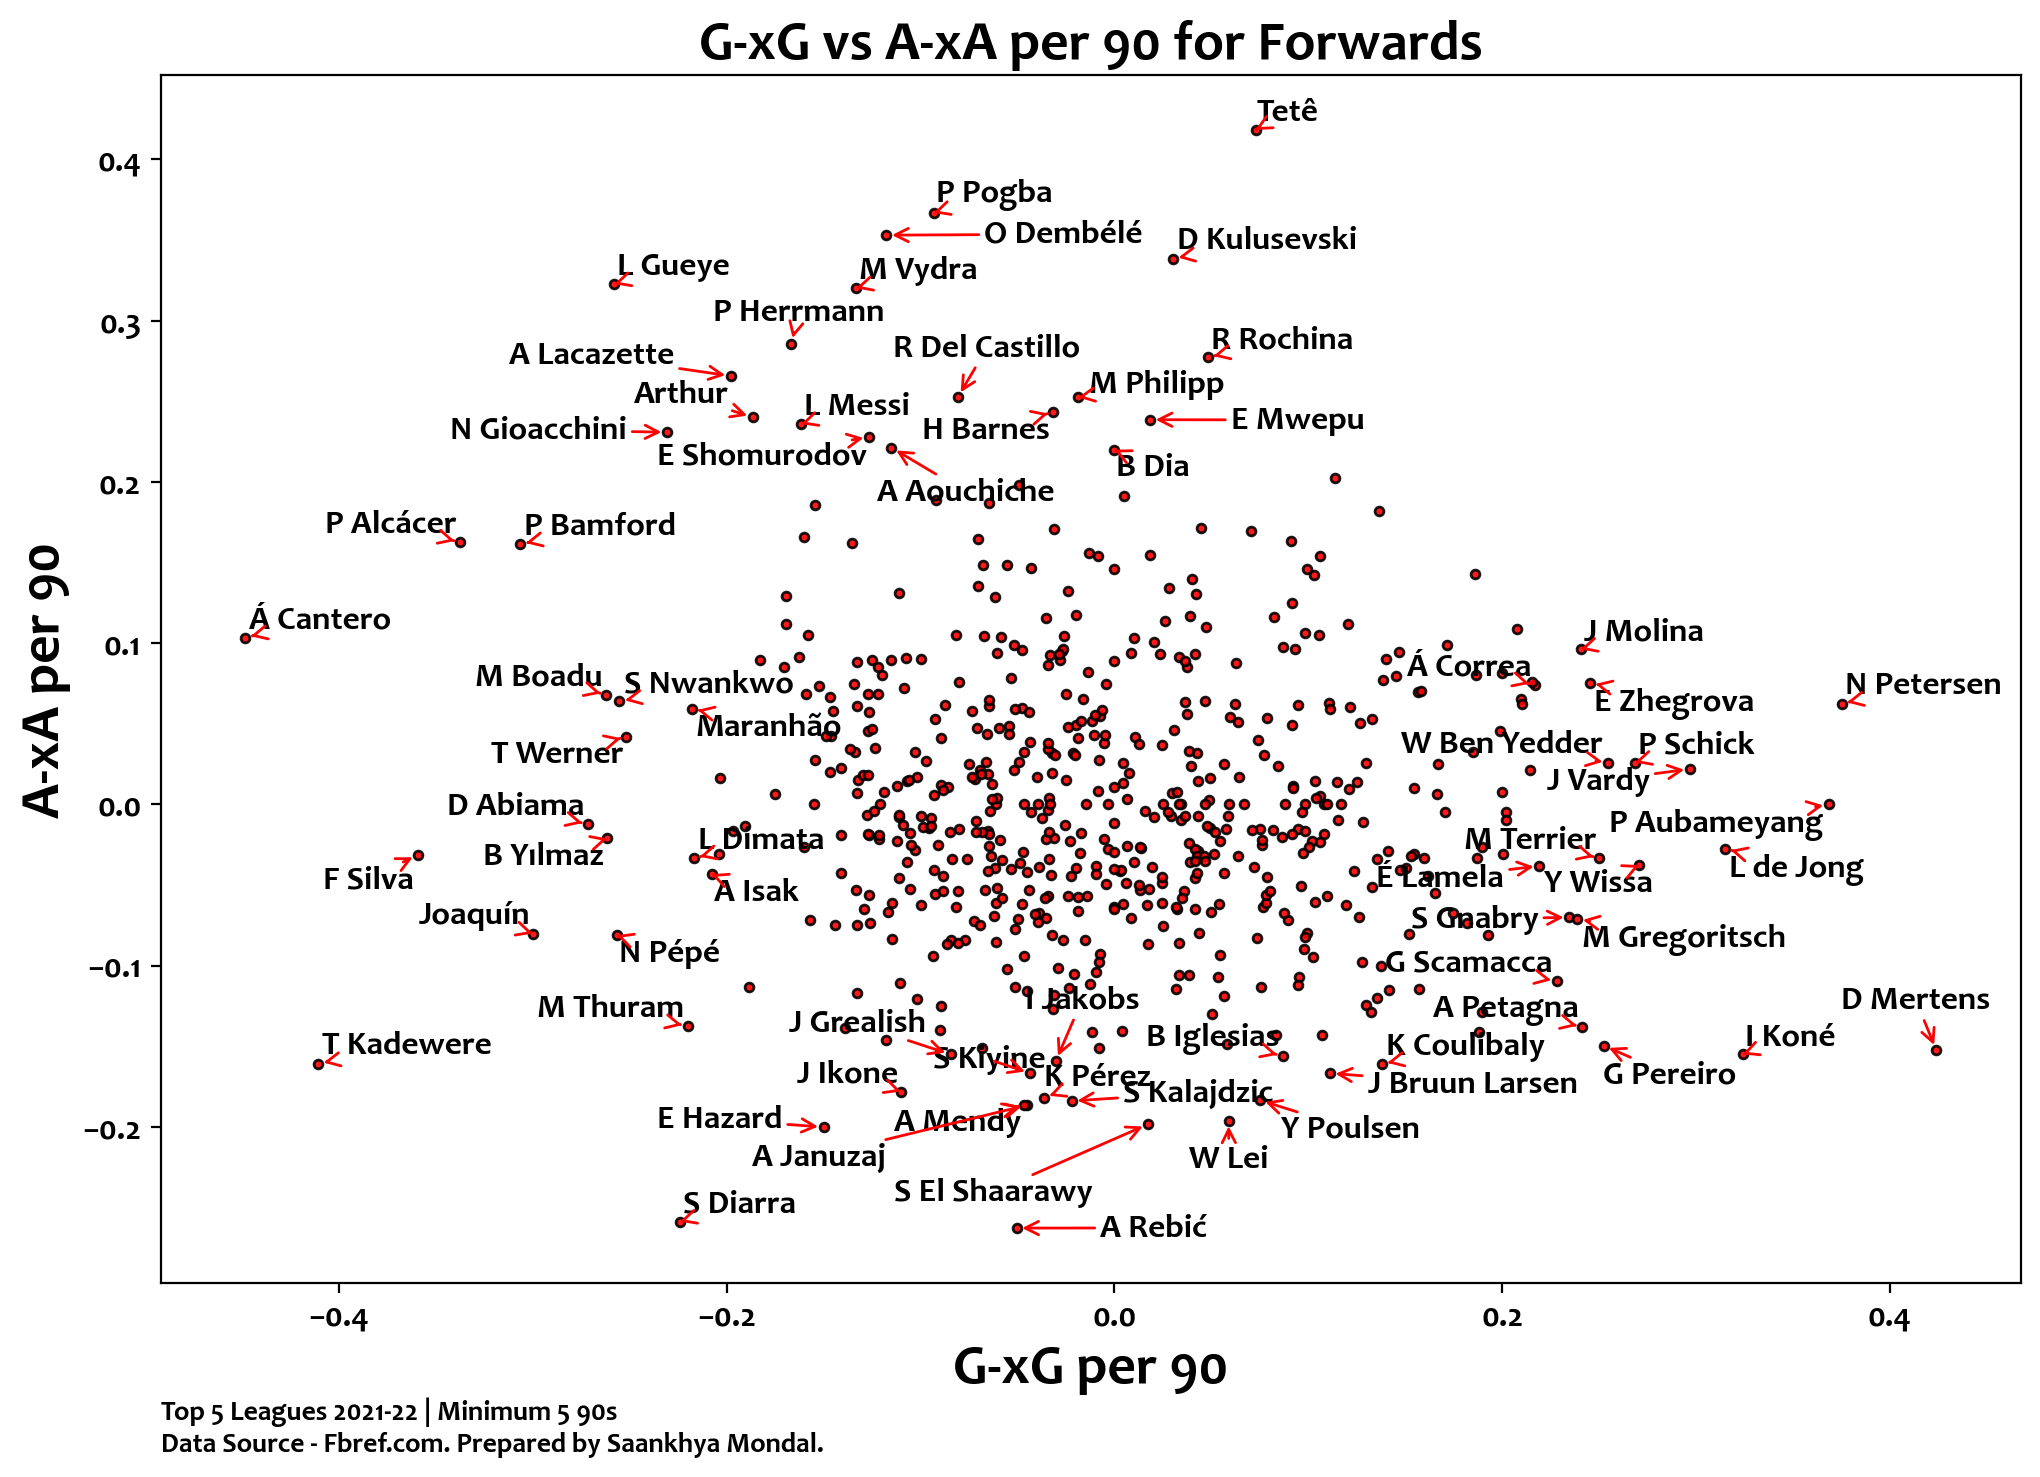

In [37]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['A-xAp90'] = data['A-xA']/data['90s']
data['G-xGp90'] = data['G-xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['A-xAp90'].quantile(0.970)
outlier_bottom = data['A-xAp90'].quantile(0.03)
outlier_right = data['G-xGp90'].quantile(0.970)
outlier_left = data['G-xGp90'].quantile(0.03)

par_x = list(data['G-xGp90'].astype(float))
par_y = list(data['A-xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('G-xG per 90', fontsize=20)
ax.set_ylabel('A-xA per 90', fontsize=20)
ax.set_title('G-xG vs A-xA per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

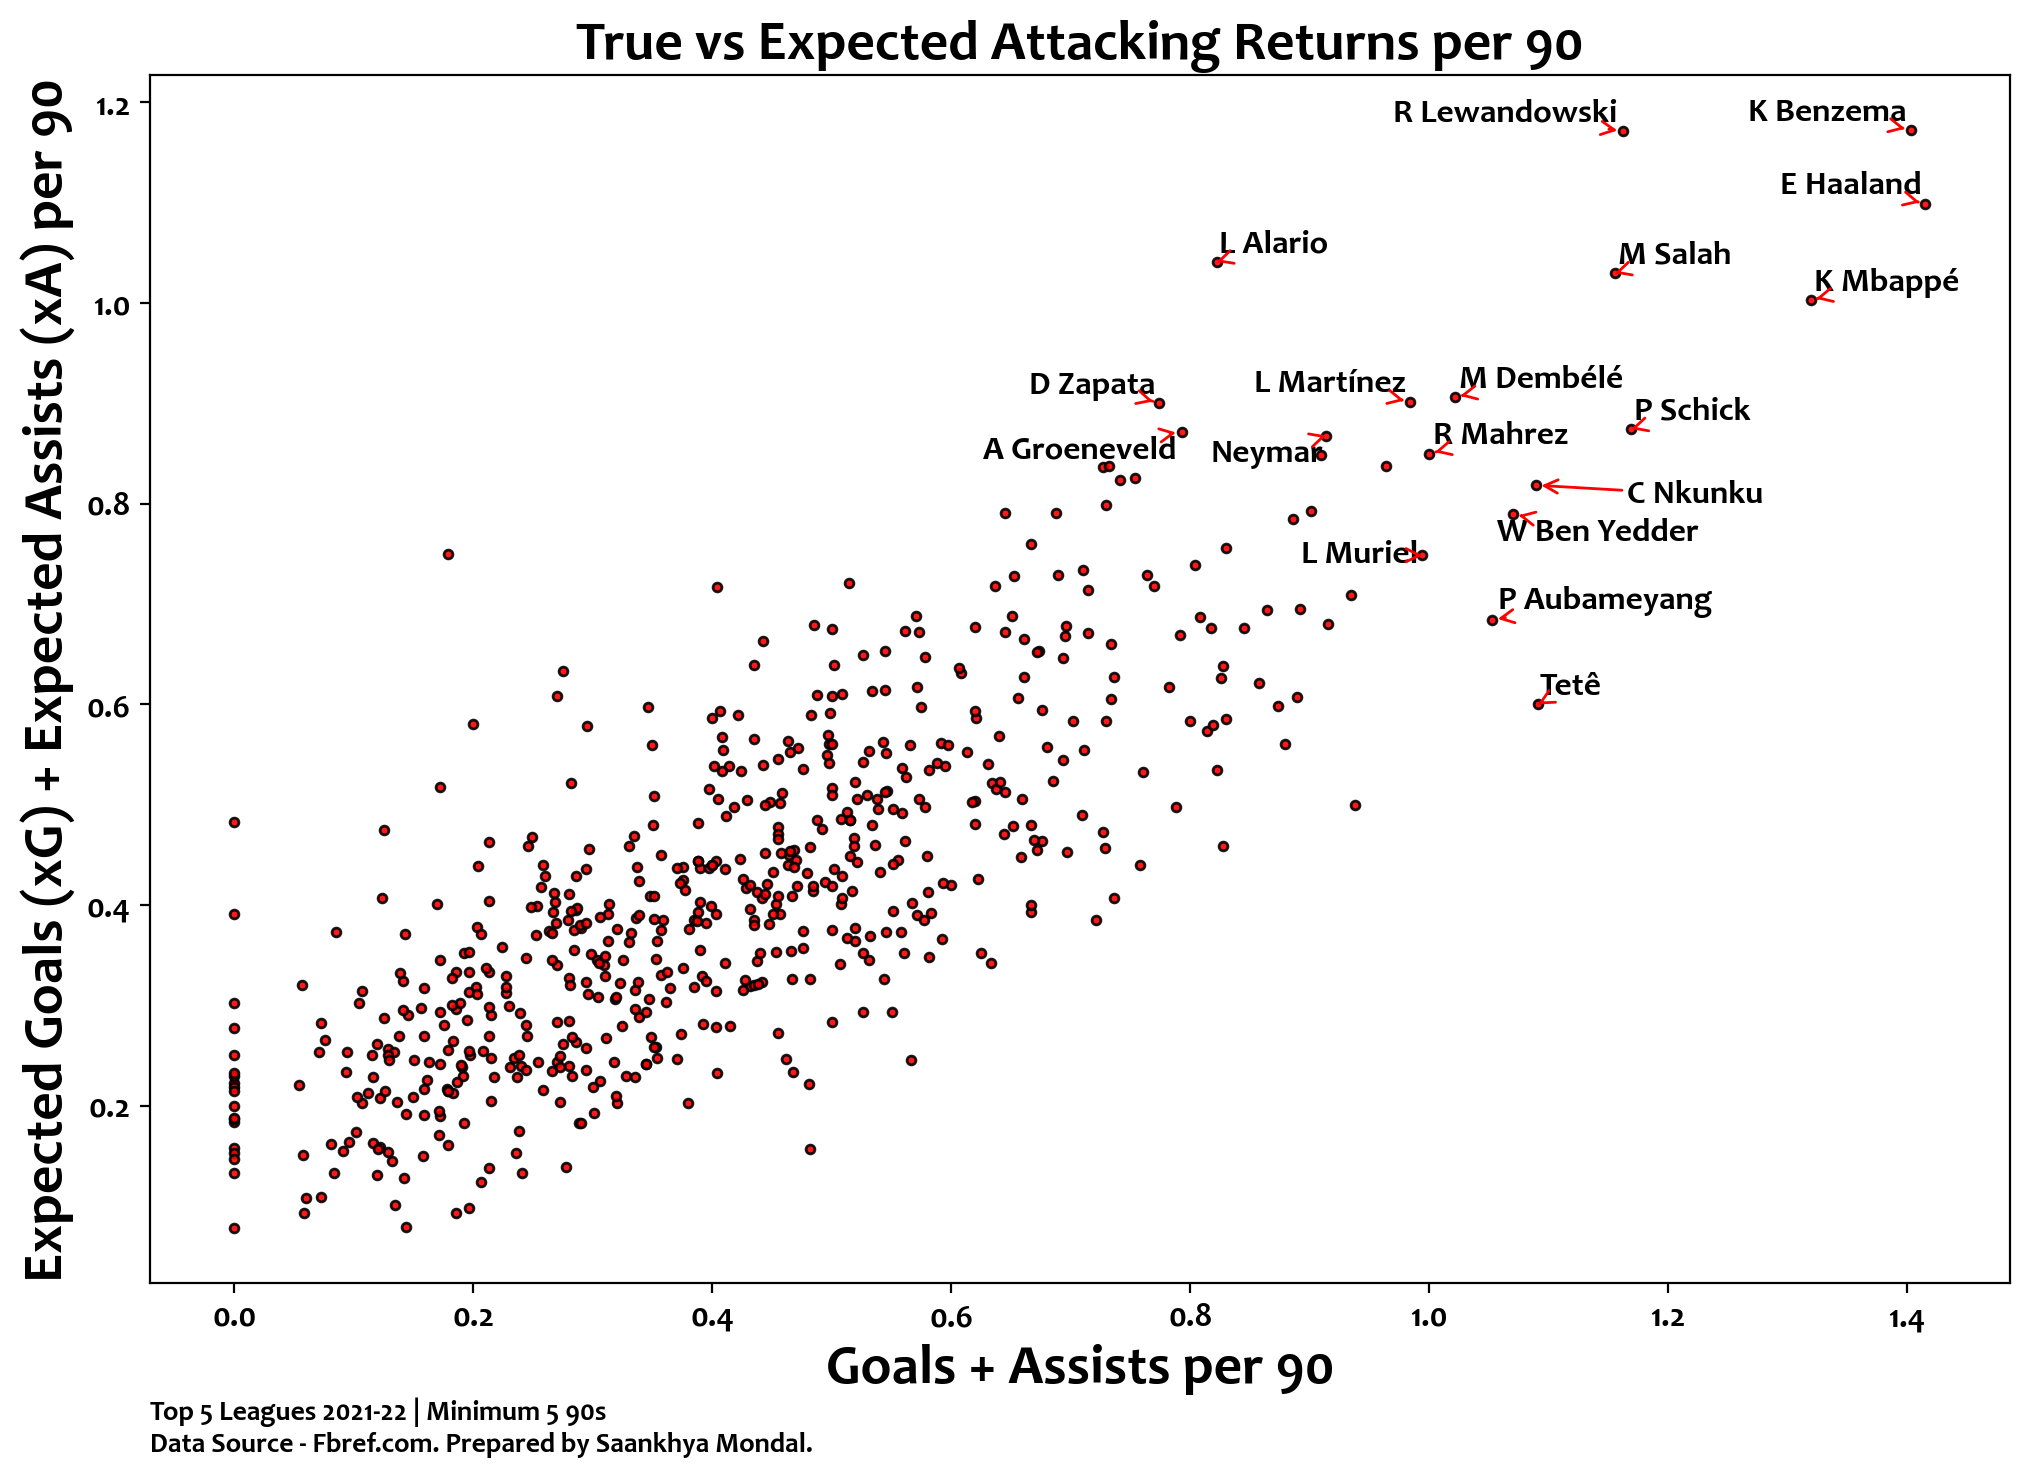

In [38]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[['Player', '90s', 'Gls', 'xG', 'Ast', 'xA']]
data['Gp90'] = data['Gls']/data['90s']
data['Ap90'] = data['Ast']/data['90s']
data['xGp90'] = data['xG']/data['90s']
data['xAp90'] = data['xA']/data['90s']

data['G+Ap90'] = data['Gp90'] + data['Ap90']
data['xG+xAp90'] = data['xGp90'] + data['xAp90']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xG+xAp90'].quantile(0.980)
outlier_bottom = data['xG+xAp90'].quantile(0.01)
outlier_right = data['G+Ap90'].quantile(0.980)
outlier_left = data['G+Ap90'].quantile(0.01)

par_x = list(data['G+Ap90'].astype(float))
par_y = list(data['xG+xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals + Assists per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) + Expected Assists (xA) per 90', fontsize=20)
ax.set_title('True vs Expected Attacking Returns per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [39]:
fig.savefig('Images/G+AvsxG+xAp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

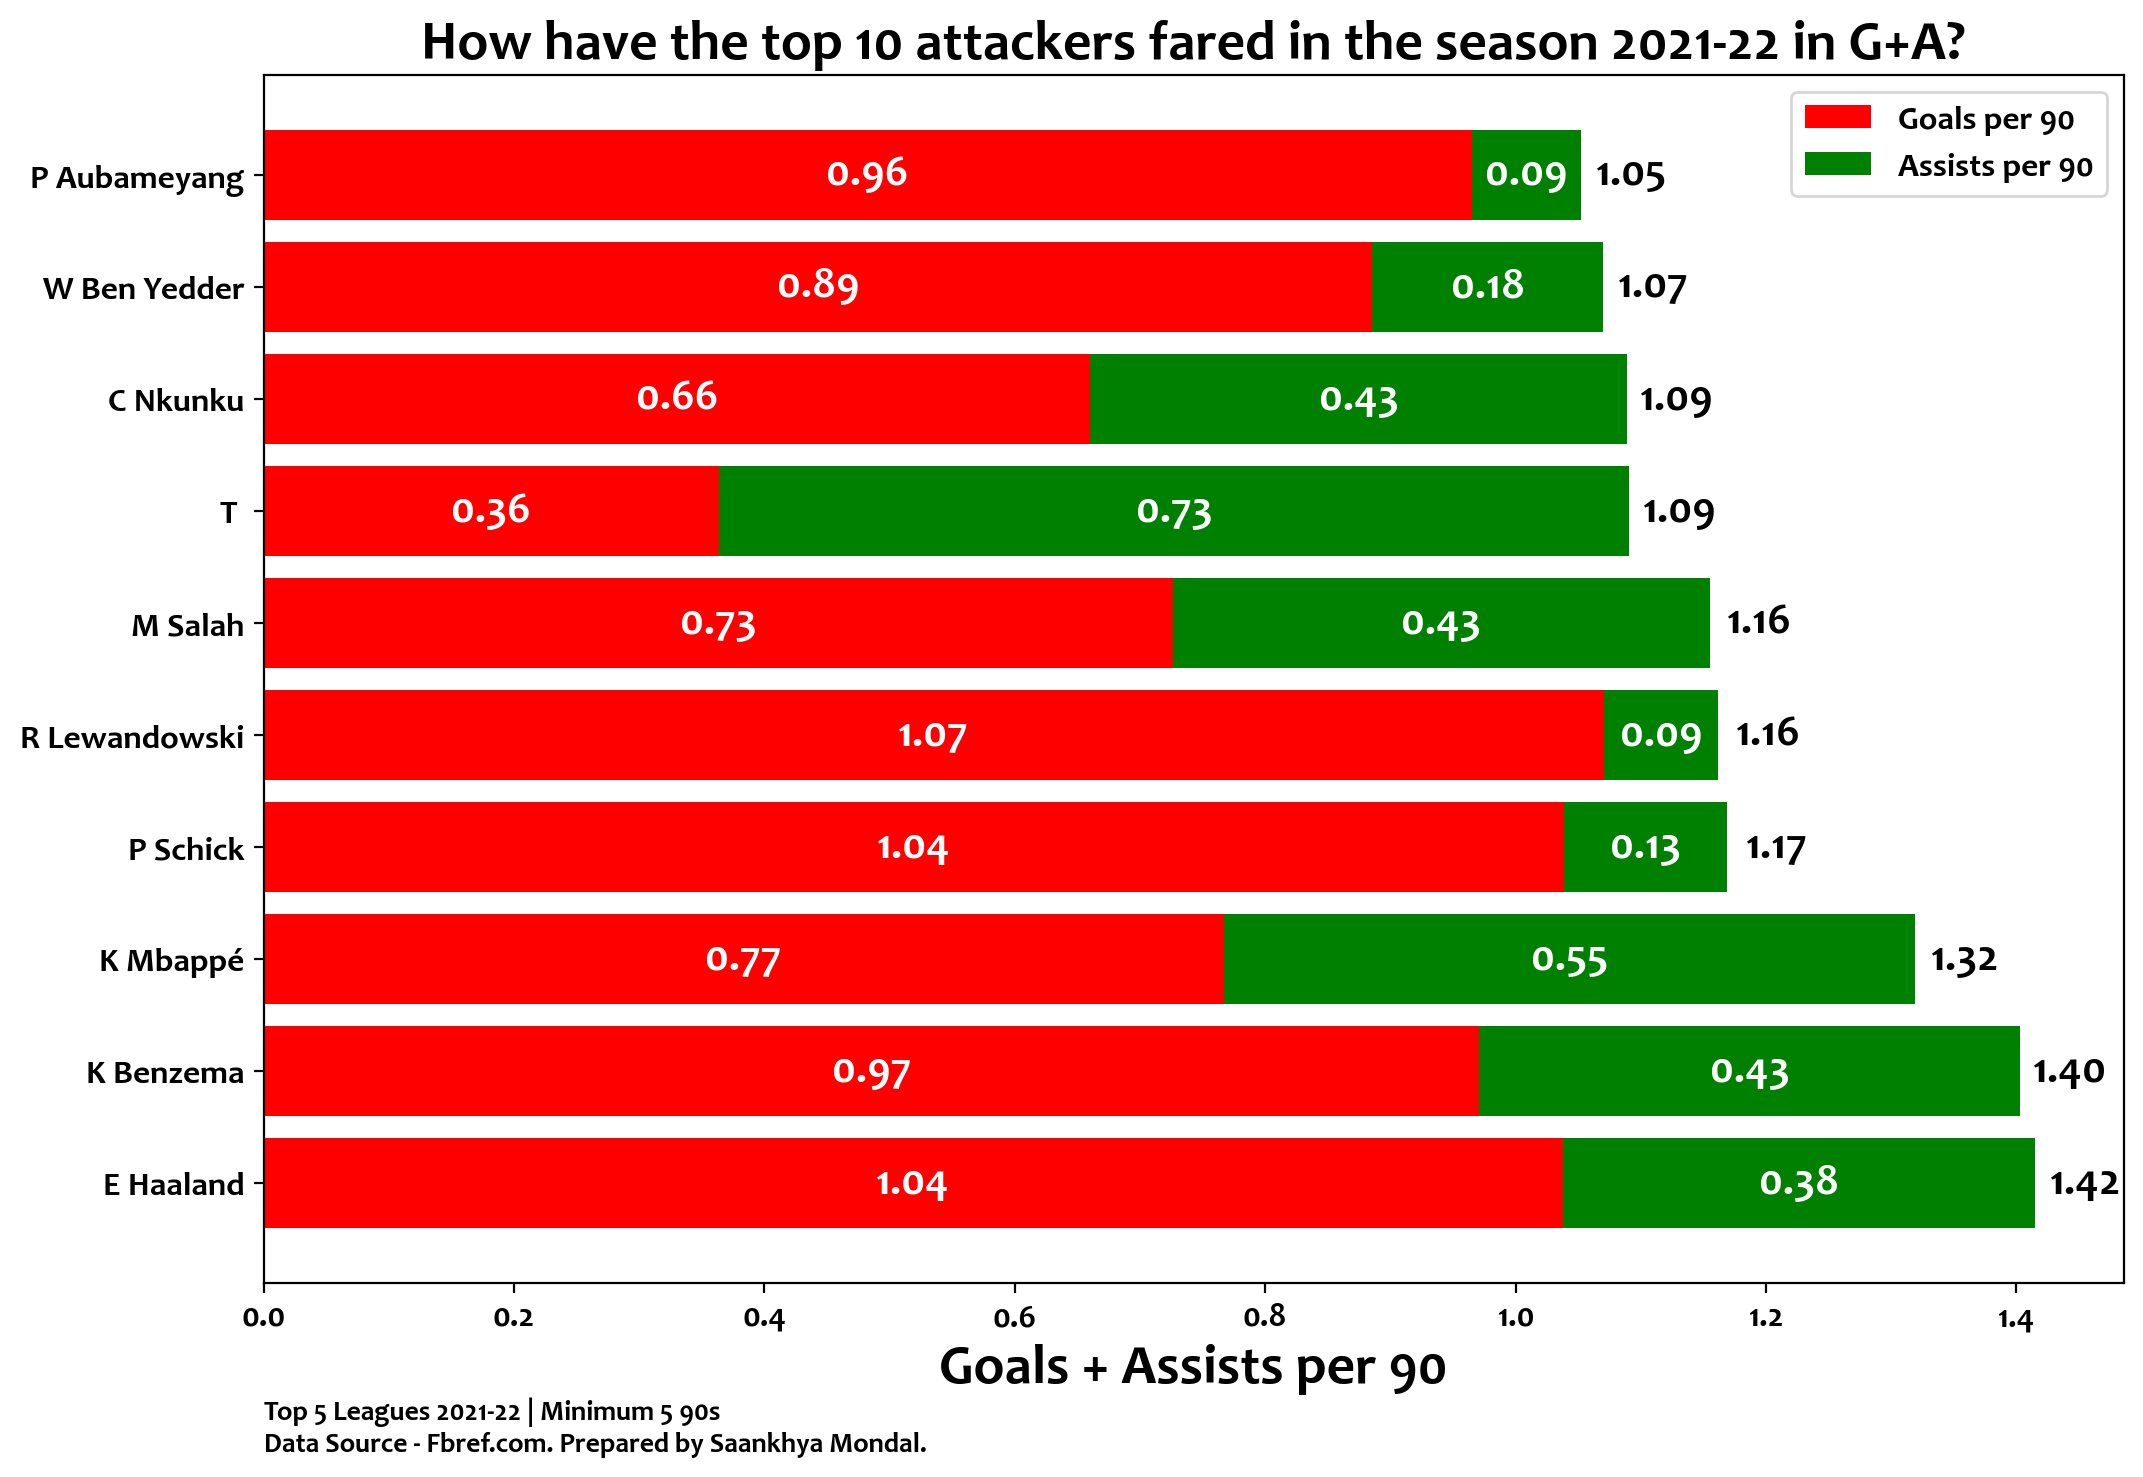

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))
d = data.sort_values(by='G+Ap90', ascending=False)
d = d.iloc[:10]
fig.set_dpi(200)
p1 = list(d['Gp90'])
p2 = list(d['Ap90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Goals per 90', 'Assists per 90'])
plt.xlabel('Goals + Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [41]:
fig.savefig('Images/G+Ap90_top10.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

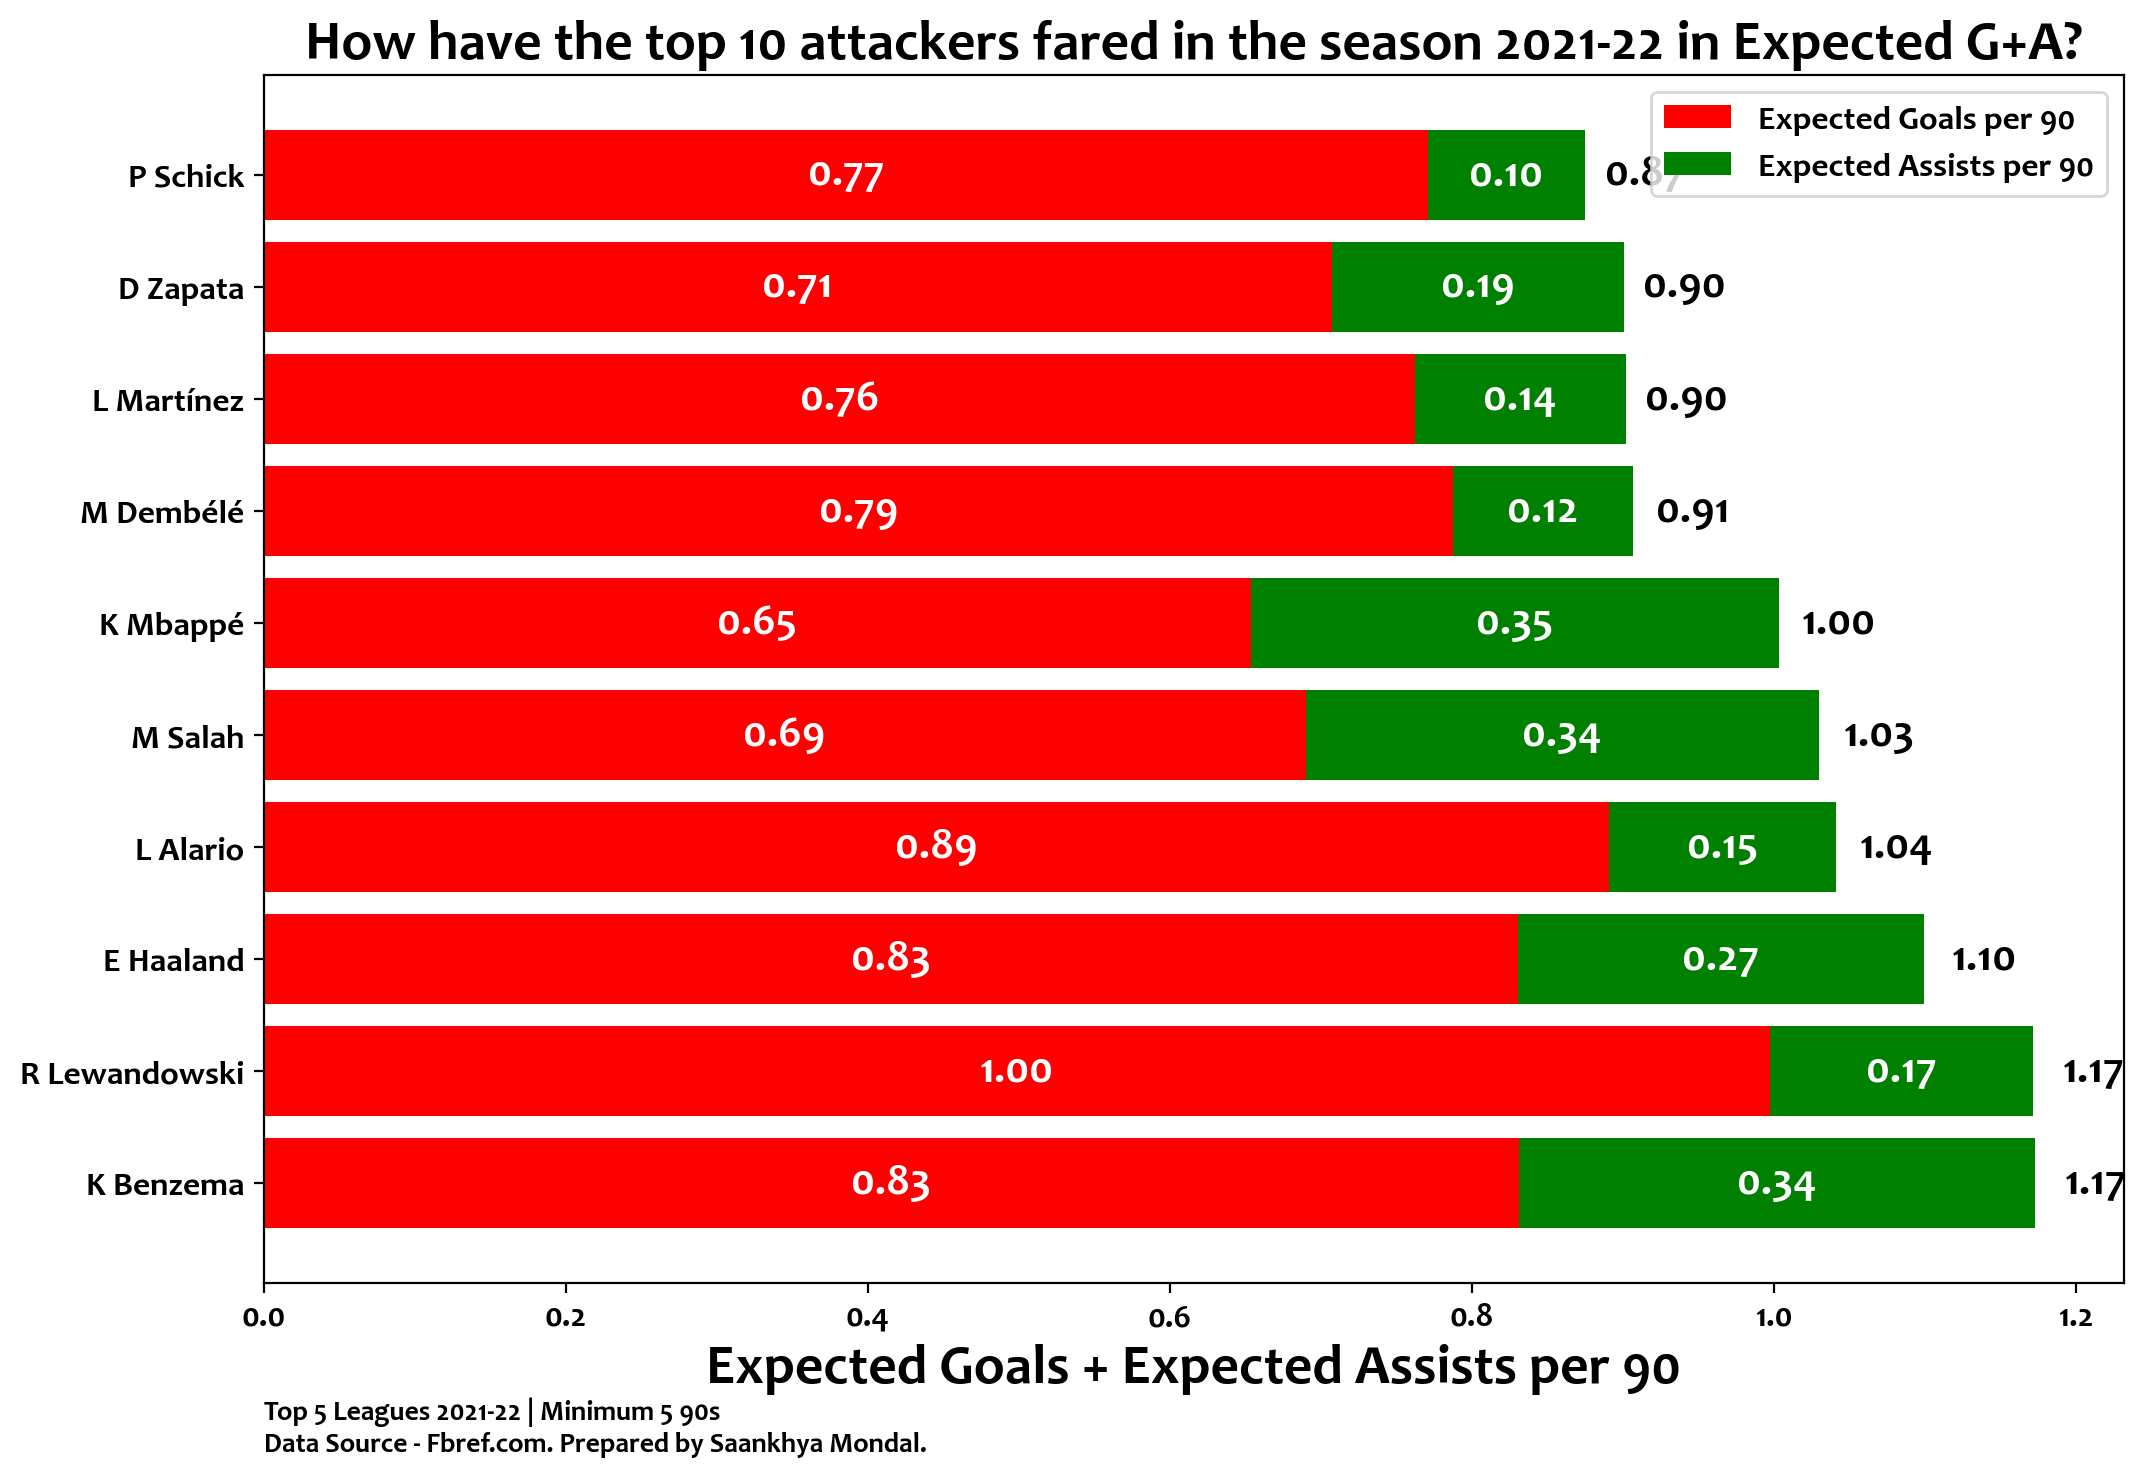

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
d = data.sort_values(by='xG+xAp90', ascending=False)
d = d.iloc[:10]
p1 = list(d['xGp90'])
p2 = list(d['xAp90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Expected Goals per 90', 'Expected Assists per 90'])
plt.xlabel('Expected Goals + Expected Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in Expected G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [43]:
fig.savefig('Images/xG+xAp90_top10.png', dpi=400, bbox_inches='tight')

In [44]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 4 to 2889
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      952 non-null    object
 1   Nation      951 non-null    object
 2   Pos         952 non-null    object
 3   Squad       952 non-null    object
 4   Comp        952 non-null    object
 5   Age         951 non-null    object
 6   Born        951 non-null    object
 7   90s         952 non-null    object
 8   Gls         952 non-null    object
 9   Sh_x        952 non-null    object
 10  SoT         952 non-null    object
 11  SoT%        868 non-null    object
 12  Sh/90       952 non-null    object
 13  SoT/90      952 non-null    object
 14  G/Sh        868 non-null    object
 15  G/SoT       764 non-null    object
 16  Dist        868 non-null    object
 17  FK          952 non-null    object
 18  PK          952 non-null    object
 19  PKatt       952 non-null    object
 20  xG       

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

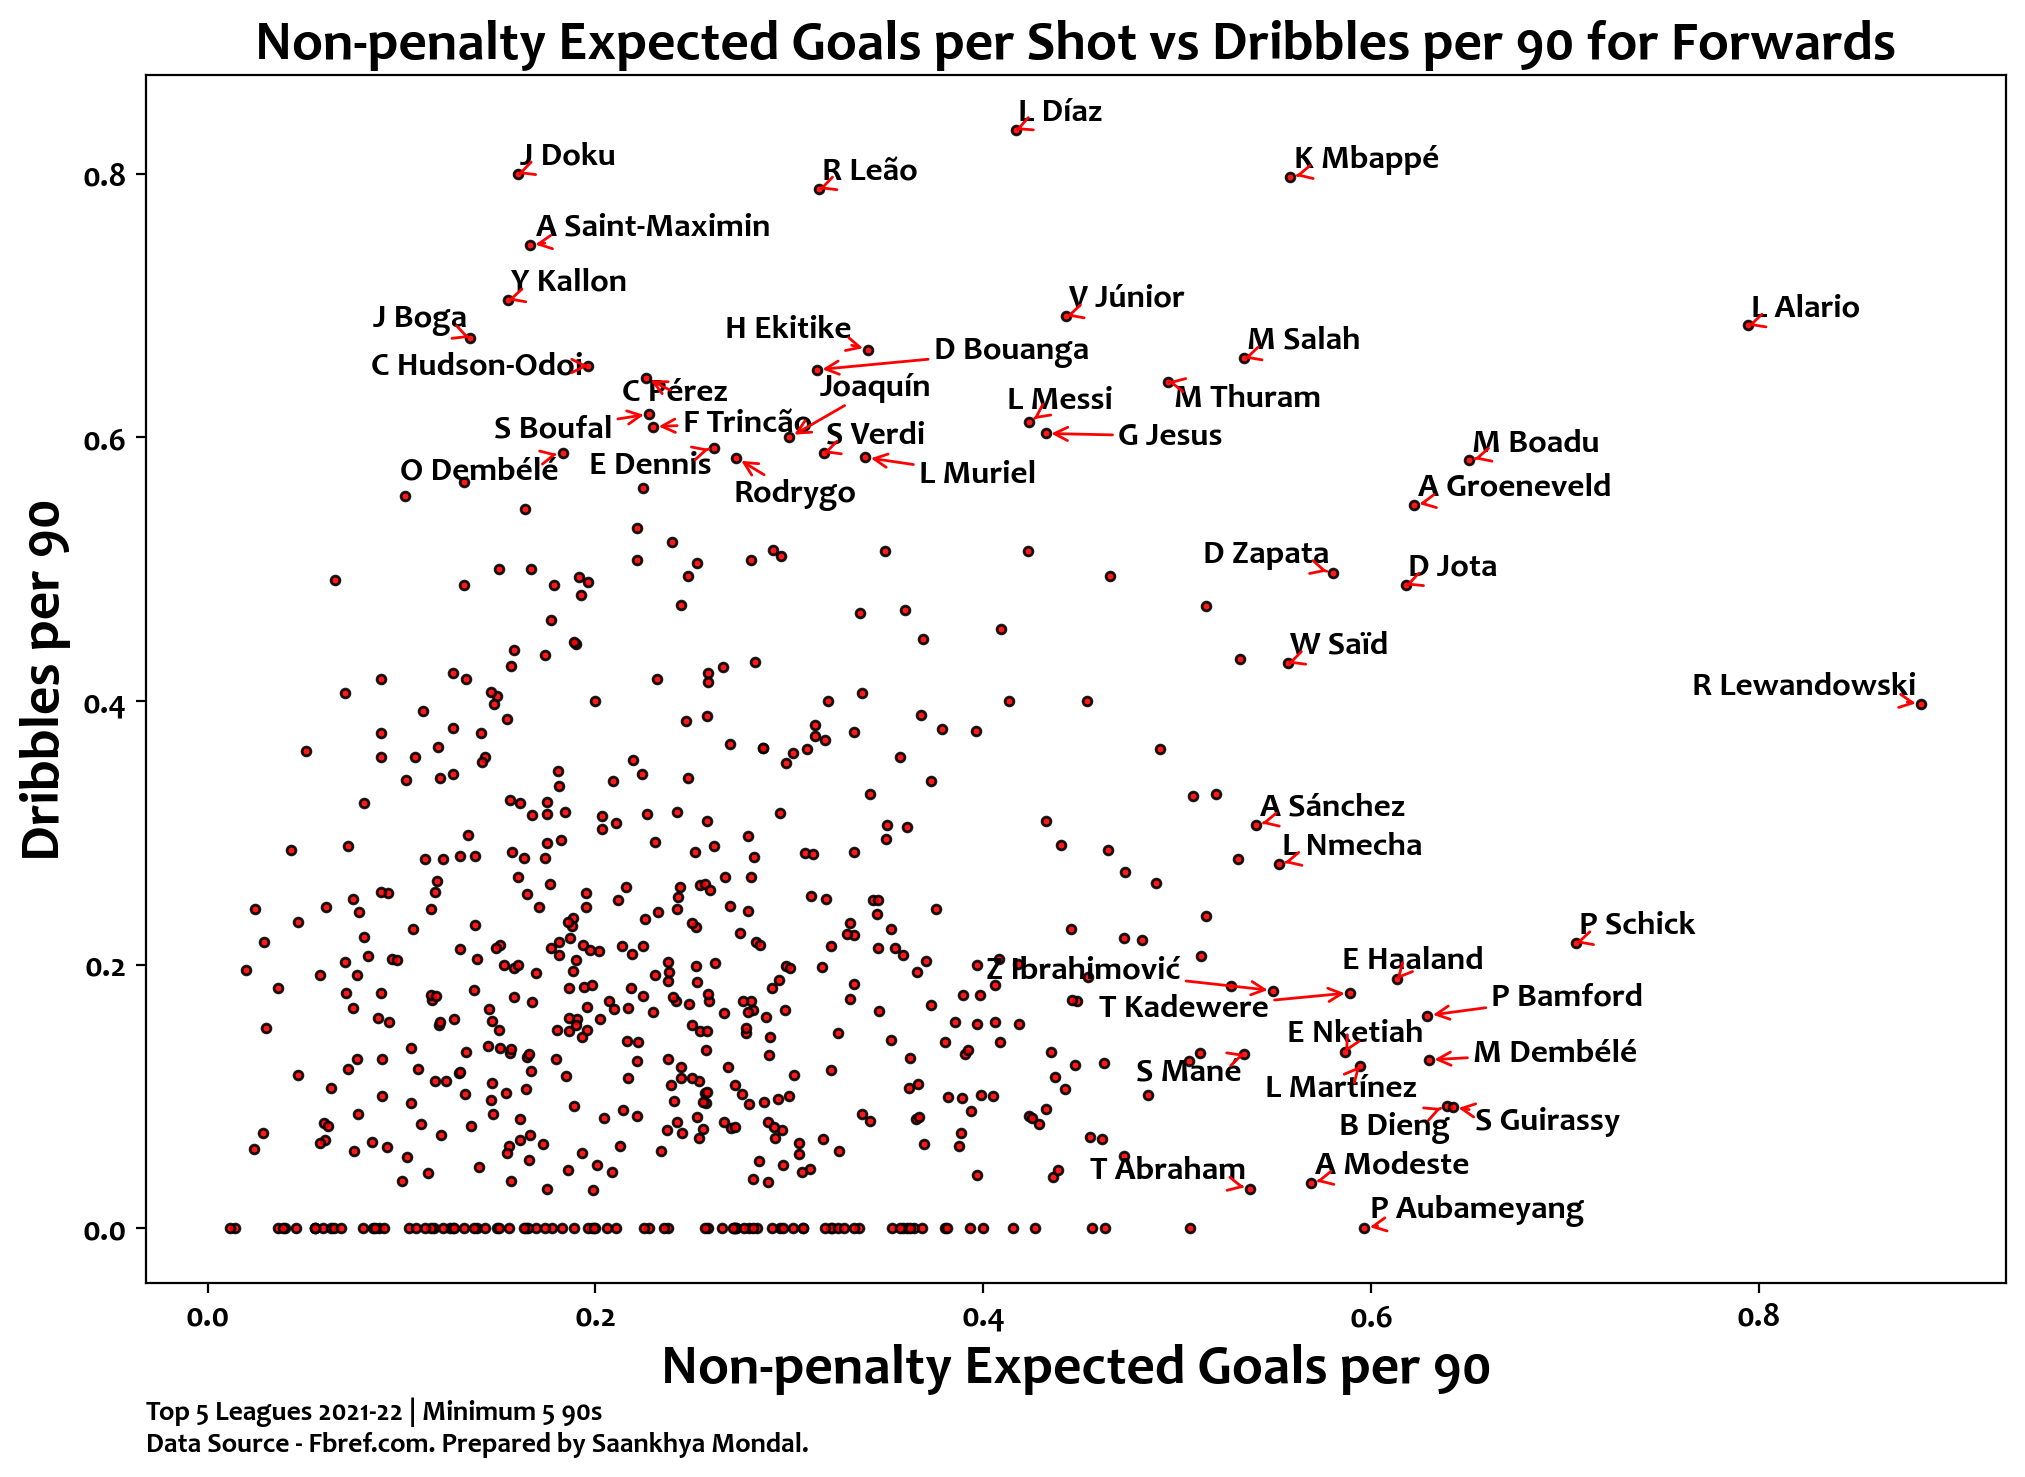

In [45]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['npxGp90'] = data['npxG']/data['90s']
data['Dp90'] = data['Drib']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['Dp90'].quantile(0.960)
outlier_bottom = data['Dp90'].quantile(0.03)
outlier_right = data['npxGp90'].quantile(0.960)
outlier_left = data['npxGp90'].quantile(0.03)

par_x = list(data['npxGp90'].astype(float))
par_y = list(data['Dp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Non-penalty Expected Goals per 90', fontsize=20)
ax.set_ylabel('Dribbles per 90', fontsize=20)
ax.set_title('Non-penalty Expected Goals per Shot vs Dribbles per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

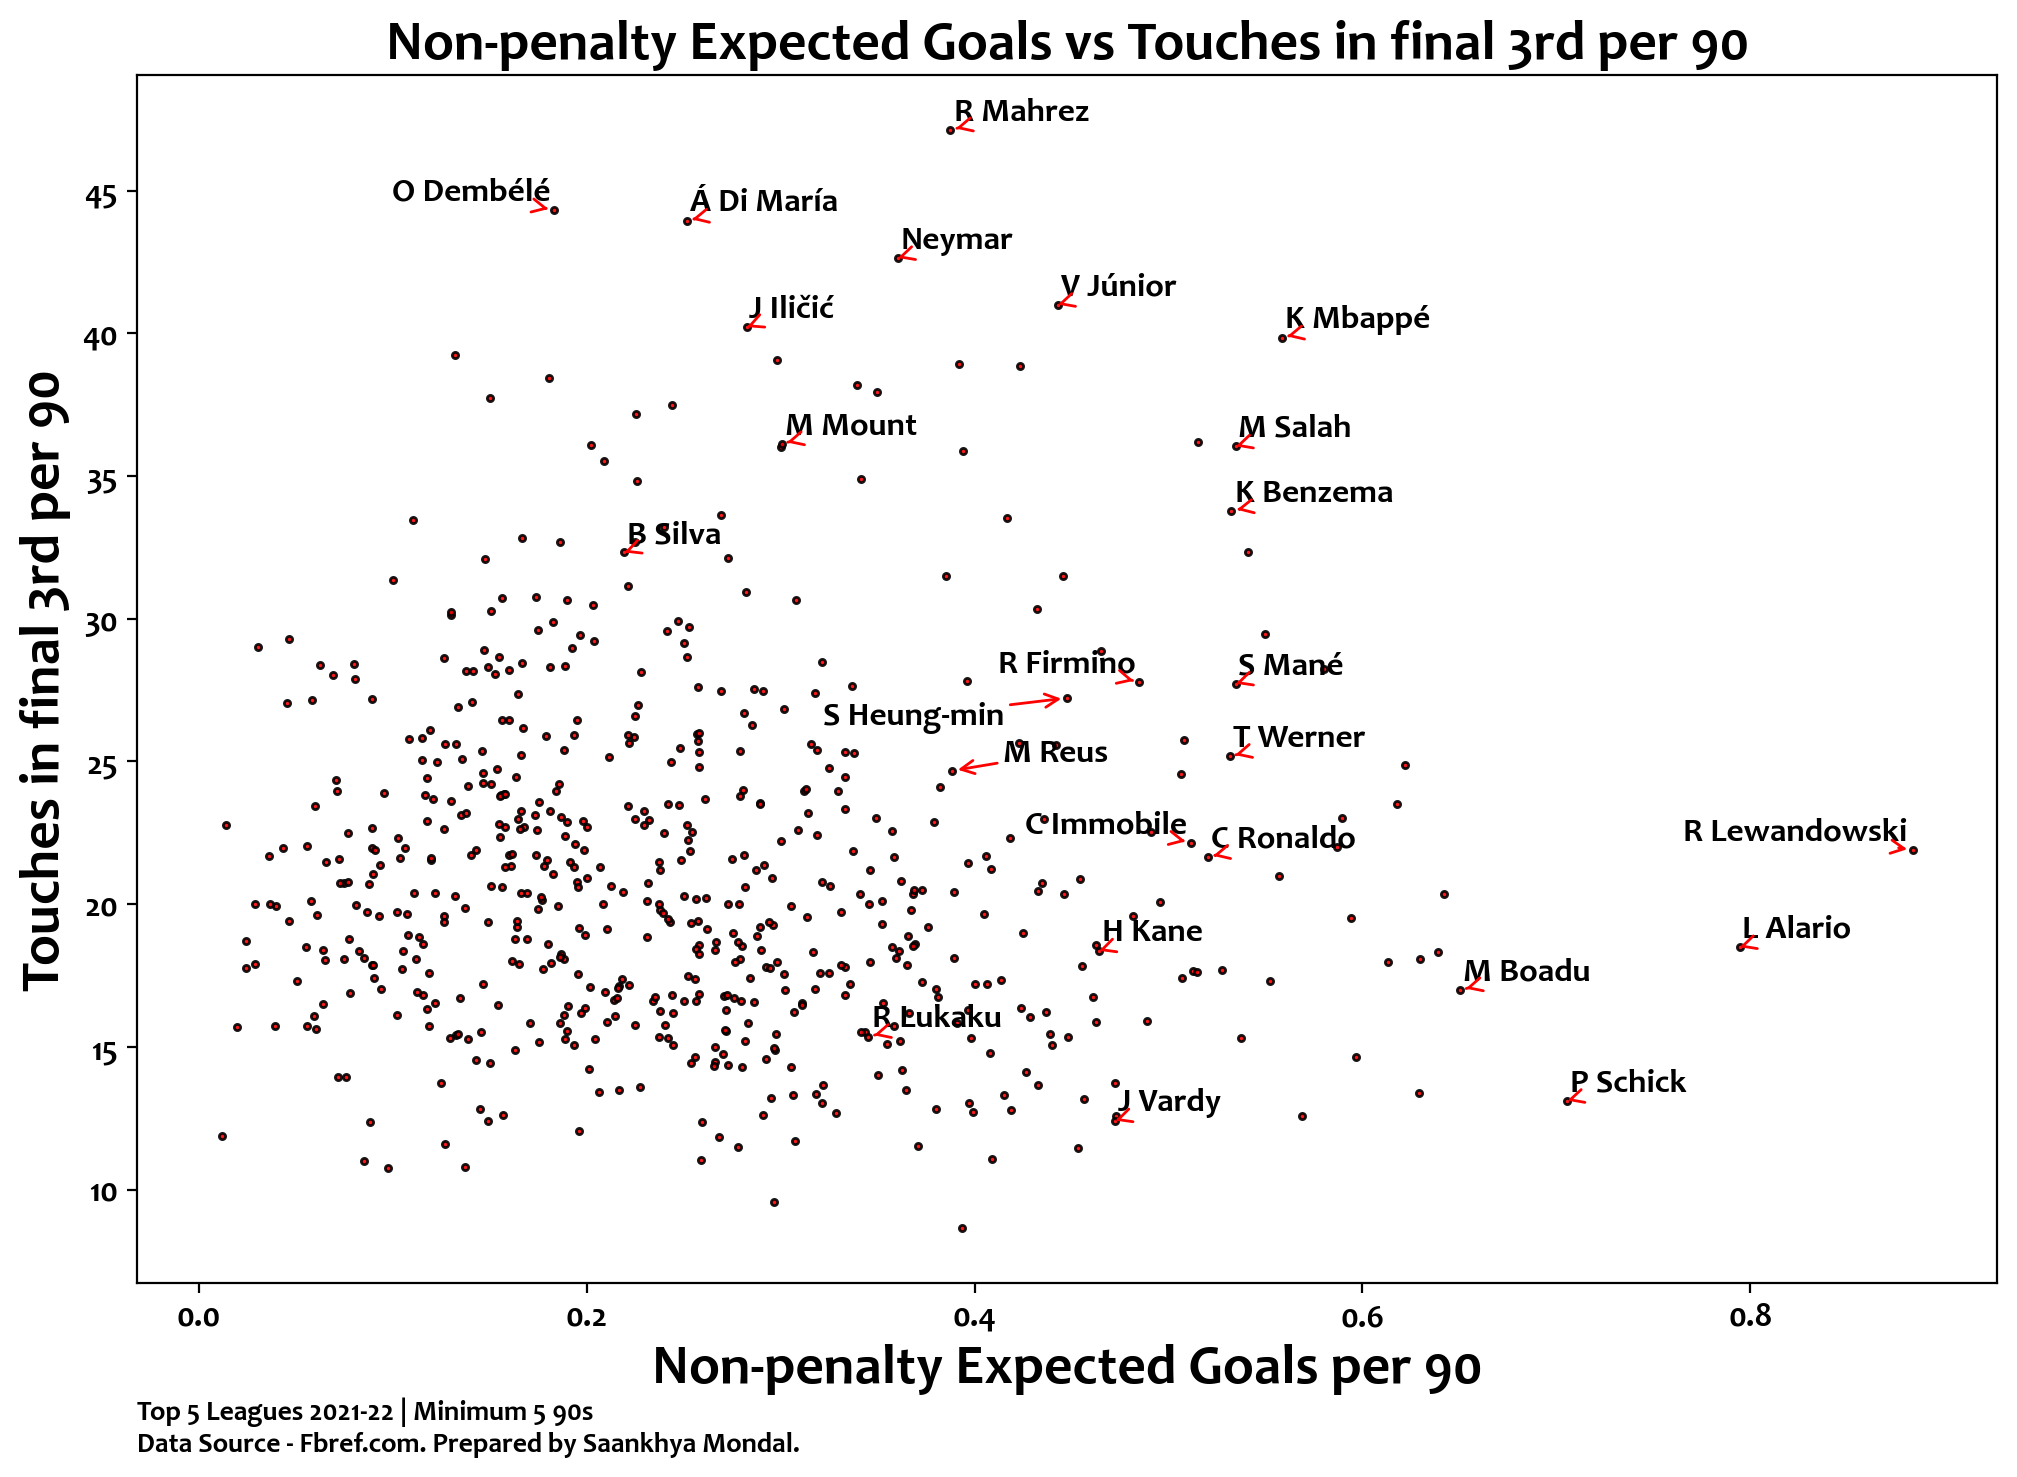

In [46]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
players = ['Trent', 'Benzema', 'Firmino', 'Thomas Müller', 'Lukaku', 'Ronaldo', 'Salah', 'Werner', 'Sadio', 'Vardy', 'Kane', 'Heung-min', 'Immobile', 'Robertson', 'Chilwell', 'Reus', 'Mount', 'Bruno', 'Bernardo Silva']
data['npxGp90'] = data['npxG']/data['90s']
data['Tp90'] = data['Att 3rd']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['Tp90'].quantile(0.990)
outlier_bottom = data['Tp90'].quantile(0.01)
outlier_right = data['npxGp90'].quantile(0.995)
outlier_left = data['npxGp90'].quantile(0.01)

def check_name_present(name):
    for i in players:
        if i in name:
            return True
    return False

par_x = list(data['npxGp90'].astype(float))
par_y = list(data['Tp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=5, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Non-penalty Expected Goals per 90', fontsize=20)
ax.set_ylabel('Touches in final 3rd per 90', fontsize=20)
ax.set_title('Non-penalty Expected Goals vs Touches in final 3rd per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [47]:
fig.savefig('Images/npxGp90vsTf3p90.png', dpi=400, bbox_inches='tight')